In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TSML

In [2]:
def tanh(X):
    return (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))

In [3]:
def get_one_hot(targets):
    targets=np.asarray(targets).reshape(-1)
    num_classes=len(np.unique(targets))
    indices=np.searchsorted(np.unique(targets),targets)
    res = np.eye(num_classes)[indices]
    return res.reshape(len(targets),num_classes)

In [4]:
def mat_ohe(data,cols_to_ohe):
    ohe_cols=np.apply_along_axis(get_one_hot,0,data[:,cols_to_ohe])[:,:,0]
    data=np.hstack((data,ohe_cols))
    data=np.delete(data,cols_to_ohe,1)
    return data.astype(float)

In [5]:
def softmax(X):
    p=np.exp(X)
    return(p/(p.sum(1).reshape(X.shape[0],1)))

In [6]:
def cost(y,p):
    return -1*np.sum(np.multiply(y,np.log(p)))/y.shape[0]

In [7]:
data=np.random.randn(2000,2)
data2=(25./100.)*np.random.randn(1000,2)
data3=2.5*np.random.randn(3000,2)

circle=np.array([[x[0],x[1]] for x in data if (np.sqrt(x[0]**2+x[1]**2)>2.0)])
circle2=np.array(data2)
circle3=np.array([[x[0],x[1]] for x in data3 if (np.sqrt(x[0]**2+x[1]**2)>5.50)])
data2=np.hstack((circle2,np.zeros((circle2.shape[0],1))))
data=np.hstack((circle,np.ones((circle.shape[0],1))))
data3=np.hstack((circle3,2*np.ones((circle3.shape[0],1))))
X=np.vstack((data,data2,data3))
np.random.shuffle(X)
y=X[:,-1:]
X=X[:,:-1]

In [8]:
y=mat_ohe(y,[0])

In [9]:
colors=["red","blue","green"]

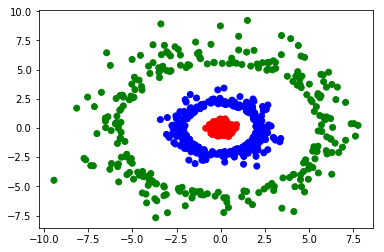

In [10]:
plt.scatter([X[:,0]],[X[:,1]], color=np.array(colors)[np.array(np.argmax(y,axis=1).reshape(-1))])

In [11]:
nodes=[10]*10+[3]

In [24]:
model=TSML.PReLUNet(nodes,X.shape[1],task="Classification",scaleweights=True)

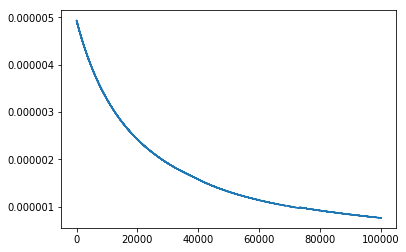

In [105]:
model.train(X,y,100000,1e-4)
plt.plot(range(len(model.error)),model.error)

In [107]:
model.predict(X)

In [108]:
(model.predictions==y).mean()*100

100.0